# Plotting age distributions with respect to genotype groups

0 W:0.9705 p:0.0222 - 102 subjects between 46 and 75
1 W:0.9539 p:0.0769 - 44 subjects between 45 and 71
2 W:0.9613 p:0.0005 - 143 subjects between 45 and 75
3 W:0.9640 p:0.0004 - 160 subjects between 45 and 74
4 W:0.9306 p:0.0013 - 65 subjects between 45 and 67


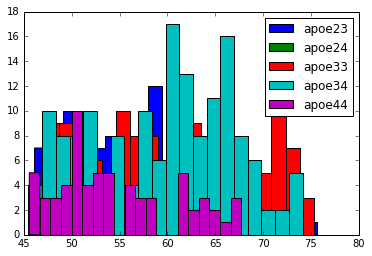

In [40]:
%matplotlib inline
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt

data = pd.read_excel('/home/grg/spm/data/covariates.xls')

for i in xrange(5):
    x = data[data['apo'] == i]['age'].values
    plt.hist(x, bins=20)
    print i, 'W:%.4f p:%.4f -'%stats.shapiro(x), len(x), 'subjects between', int(min(x)), 'and', int(max(x))

plt.legend(['apoe23', 'apoe24', 'apoe33', 'apoe34', 'apoe44'])
plt.show()

For two of the 5 groups, the Shapiro test p-value is lower than 1e-3, which means that the distributions of these two groups can't be considered as normal. (But theorically none of them is)

# Matching pairs using nearest neighbours

The matching algorithm:

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

def get_matching_pairs(treated_df, non_treated_df, scaler=True):

    treated_x = treated_df.values
    non_treated_x = non_treated_df.values
    if scaler:
        scaler = StandardScaler()
        scaler.fit(treated_x)
        treated_x = scaler.transform(treated_x)
        non_treated_x = scaler.transform(non_treated_x)

    nbrs = NearestNeighbors(n_neighbors=1, algorithm='ball_tree').fit(non_treated_x)
    distances, indices = nbrs.kneighbors(treated_x)
    indices = indices.reshape(indices.shape[0])    
    matched = non_treated_df.ix[indices]
    matched = non_treated_df.irow(matched.index)
    return matched

#### Loading data

In [42]:
df = pd.read_excel('/home/grg/spm/data/covariates.xls')
df = df[['subject','apo','age','gender']]

groups = [df[df['apo']==i] for i in xrange(5)]
for i in xrange(5):
    groups[i] = groups[i].set_index(groups[i]['subject'])
    del groups[i]['subject']
    del groups[i]['apo']

### Matching the groups

In [43]:
treated_df =  groups[4]
matched_df = [get_matching_pairs(treated_df, groups[i], scaler=False) for i in xrange(4)]

/home/grg/jupyter/lib/python2.7/site-packages/ipykernel/__main__.py:18: FutureWarning: irow(i) is deprecated. Please use .iloc[i]


#### Plotting data and see that the groups are now matching

(array([  5.,   3.,   3.,   4.,  10.,   4.,   5.,   5.,   0.,   4.,   3.,
          3.,   0.,   0.,   5.,   2.,   3.,   2.,   1.,   3.]),
 array([ 45.5578371 ,  46.66584531,  47.77385352,  48.88186174,
         49.98986995,  51.09787817,  52.20588638,  53.31389459,
         54.42190281,  55.52991102,  56.63791923,  57.74592745,
         58.85393566,  59.96194387,  61.06995209,  62.1779603 ,
         63.28596851,  64.39397673,  65.50198494,  66.60999316,  67.71800137]),
 <a list of 20 Patch objects>)

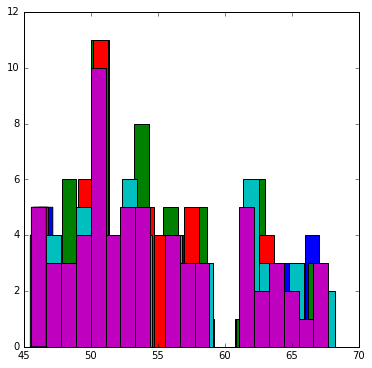

In [44]:
fig, ax = plt.subplots(figsize=(6,6))
for i in xrange(4):
    plt.hist(matched_df[i]['age'], bins=20)    
plt.hist(treated_df['age'], bins=20)